In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math

random.seed(123) # Works same every time we run

In [171]:
def mean_square_error_function(y_true, y_pred):
    return ((y_true - y_pred)**2).sum() / len(y_true)

In [172]:
my_x = np.arange(0,10,0.1)

randomness = [random.randint(-10,10) for x in range(100)]
m = 5
b = 5
y_actual = m*my_x+b
y_regression = m*my_x+b+randomness

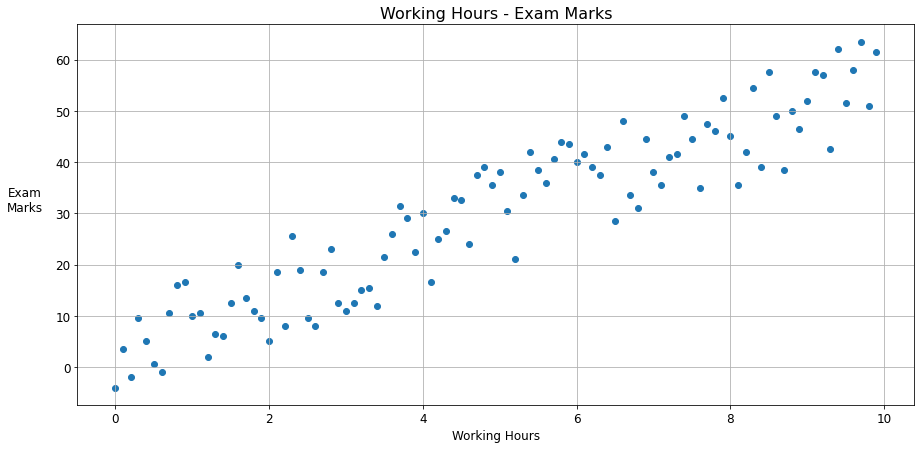

In [173]:
figure = plt.figure(1,(15,7))
plt.title("Working Hours - Exam Marks",fontsize=16)
plt.scatter(my_x, y_regression)
plt.xlabel("Working Hours",fontsize=12)
plt.yticks(np.arange(0,70,10), fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Exam\nMarks",rotation=0,fontsize=12,labelpad=30)
plt.grid(True)
plt.show()

In [174]:
def Simulated_Annealing(bounds,t_init,t_final,cooling_rate):
    initial_points_for_m = random.uniform(bounds[0],bounds[1])
    initial_points_for_b = random.uniform(bounds[0],bounds[1])
    
    
    y_pred = initial_points_for_m*my_x+initial_points_for_b # It will give us y_pred
    
    current_solution = mean_square_error_function(y_regression,y_pred) # Calculate the function
    
    current_temperature = t_init
    temperatures = [t_init] # We will save temperatures
    points_for_m = [initial_points_for_m] # We will save points for m
    points_for_b = [initial_points_for_b] # We will save points for b
    solutions = [current_solution] # We will save solutions (MSE)
    
    while current_temperature > t_final: # While current temperature is bigger than final temperature
        new_points_for_m = random.uniform(bounds[0],bounds[1]) # Sample new points for m
        new_points_for_b = random.uniform(bounds[0],bounds[1]) # Sample new points for b
        
        y_pred = new_points_for_m*my_x+new_points_for_b # evaluate the new solution
        new_solution = mean_square_error_function(y_regression,y_pred)
        
        delta = new_solution - current_solution
        
        if delta < 0: # if new_solution is smaller take it
            initial_points_for_b = new_points_for_b
            initial_points_for_m = new_points_for_m
            current_solution = new_solution
        else:
            prob = math.exp(-delta / current_temperature) # Calculate the probability of your choice
            if random.random() < prob:
                current_solution = new_solution
                initial_points_for_b = new_points_for_b
                initial_points_for_m = new_points_for_m
        
        current_temperature = current_temperature * cooling_rate # Make it cooler # Cooling rate will be the learning rate later
        temperatures.append(current_temperature) # Save the temperature
        points_for_m.append(initial_points_for_m) # Save the points for m
        points_for_b.append(initial_points_for_b) # Save the points for b
        solutions.append(current_solution)
        
    return temperatures,points_for_b,points_for_m,initial_points_for_b,initial_points_for_m,solutions
        
    

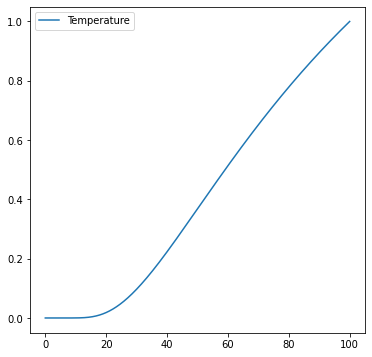

In [11]:
figure = plt.figure(1,(6,6))
delta = np.array(np.arange(0,100,0.001))
temperature =np.array(np.arange(100,0,-0.001))
prob = np.exp(-delta/temperature)
plt.plot(temperature,prob,label='Temperature')
plt.legend()
plt.show()

In [176]:
bounds_for_m_b = [-10,10]
temp,points_for_b,points_for_m,best_b,best_m,solutions= Simulated_Annealing(bounds_for_m_b,600,0,0.002)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars


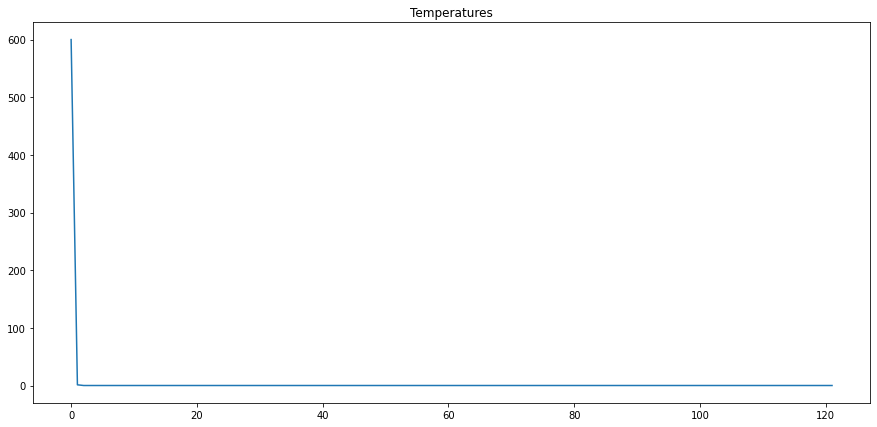

In [177]:
figure = plt.figure(1,(15,7))
plt.title("Temperatures")
plt.plot(temp)
plt.show()

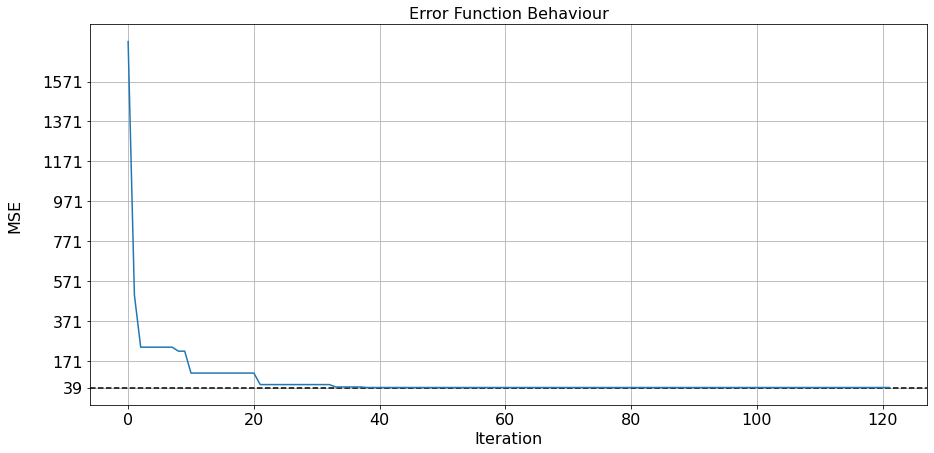

In [179]:
# Plot the error function
figure = plt.figure(1,(15,7))
plt.title("Error Function Behaviour",fontsize=16)
plt.ylabel("MSE", labelpad=20,fontsize=16)
plt.axhline(solutions[-1],color="black",linestyle='--')
y_ticks = np.arange(solutions[0],solutions[-1], -200)
y_ticks[0] = solutions[-1]
plt.yticks(y_ticks,fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.grid(True)
plt.plot(np.arange(0,len(solutions),1), solutions)
plt.savefig("Optimized_for_SA.png", format='png', dpi=300)
plt.show()

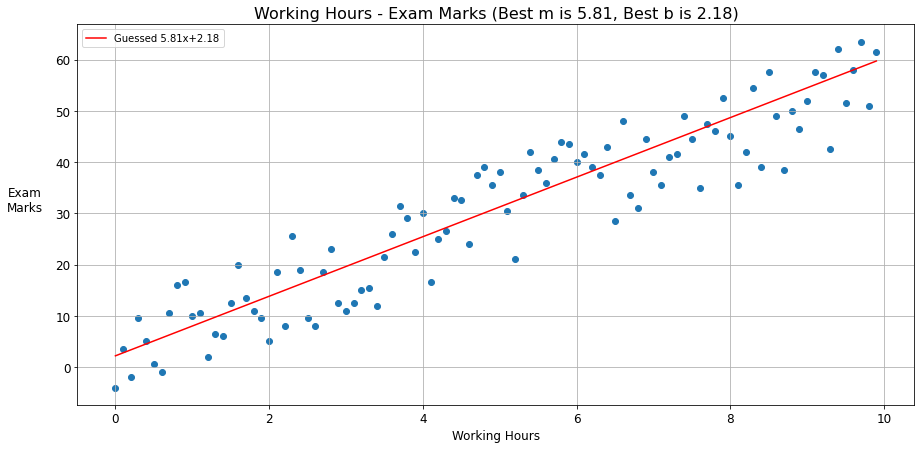

In [181]:
# Plot the final line
figure = plt.figure(1,(15,7))
plt.title(f"Working Hours - Exam Marks (Best m is {best_m:.2f}, Best b is {best_b:.2f})",fontsize=16)
plt.scatter(my_x, y_regression)
result = best_m*my_x+best_b
original = 5*my_x+5+randomness
plt.plot([my_x[0],my_x[-1]],[result[0],result[-1]],color="red",label=f"Guessed {best_m:.2f}x+{best_b:.2f}")
# plt.plot([my_x[0],my_x[-1]],[original[0],original[-1]],color="green", label="Original 5x+5")
plt.xlabel("Working Hours",fontsize=12)
plt.yticks(np.arange(0,70,10), fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Exam\nMarks",rotation=0,fontsize=12,labelpad=30)
plt.grid(True)
plt.legend()
plt.savefig("Optimized_for_SA_Best_m_Best_b.png", format='png', dpi=300)
plt.show()